# Discovery & dot plot of regulation marker TFs
This is a detailed tutorial for dot plot of regulation marker TFs. For a brief tutorial on every step, see [main.ipynb](main.ipynb).
## Load data

In [1]:
import numpy as np
from dictys.net import network
from dictys.plot.static import compute_reg_spec,fig_heatmap_reg_spec
from dictys.plot import dotplot,heatmap
d0=network.from_file('../../data/static.h5')


## An initial plot
Dot plot of regulatory activity for top regulation marker TFs

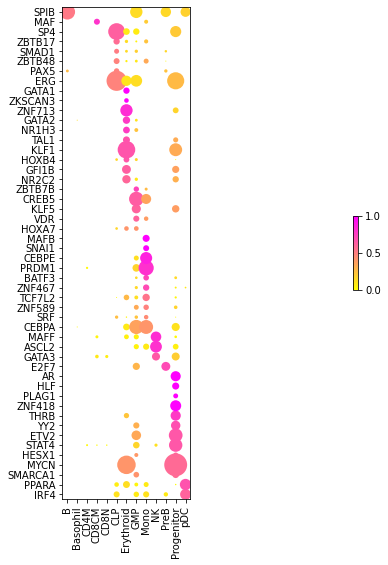

In [2]:
#Color map
cmap='spring_r'
#Compute regulatory activity, expression, and their specificity for TFs
n,v,cpm,cpm_v,reg,reg_s=compute_reg_spec(d0)
fig,ax=dotplot(n.loc[reg].iloc[::-1],v.loc[reg].iloc[::-1],cmap=cmap)


Dot plot of expression for top regulation marker TFs

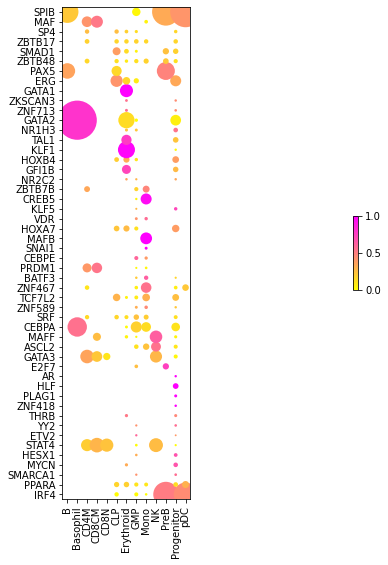

In [3]:
fig2,ax2=dotplot(cpm.loc[reg].iloc[::-1],cpm_v.loc[reg].iloc[::-1],cmap=cmap)


## Plot adjustments

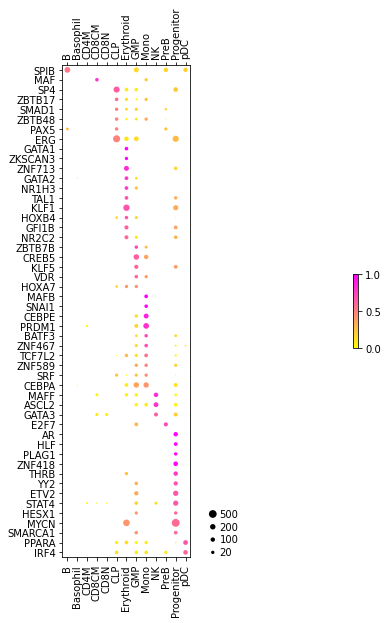

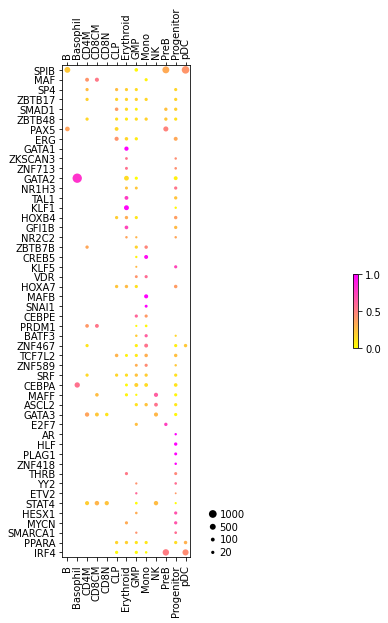

In [4]:
#Node sizes to draw legend in dot plot for regulation
node_size_target=[20,100,200,500]
#Transformation from target count to node size for regulation
node_size_map_target=lambda x:x*(x<=10)+(10+(x-10)*500/10/490)*(x>10)
#Node sizes to draw legend in dot plot for expression (CPM)
node_size_cpm=[20,100,500,1000]
#Transformation from target count to node size for regulation
node_size_map_cpm=lambda x:x*(x<=10)+(10+(x-10)*1000/20/990)*(x>10)

fig,ax=dotplot(n.loc[reg].iloc[::-1],v.loc[reg].iloc[::-1],size_transform=node_size_map_target,sizes=np.array(node_size_target),cmap=cmap)
#Top labels
ax.tick_params(top=True,labeltop=True)
fig2,ax2=dotplot(cpm.loc[reg].iloc[::-1],cpm_v.loc[reg].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)
ax2.tick_params(top=True,labeltop=True)


## Regulation marker discovery adjustments
Cell cluster/type/state names selection & ordering

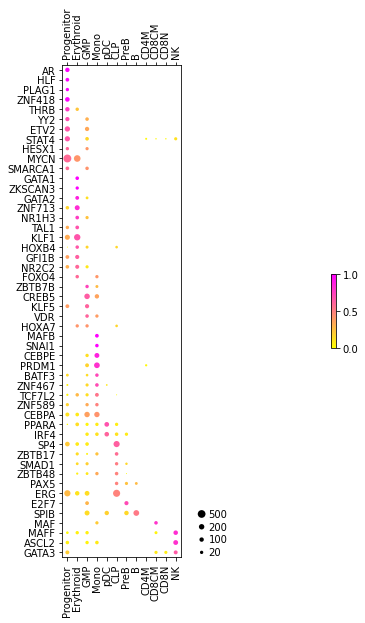

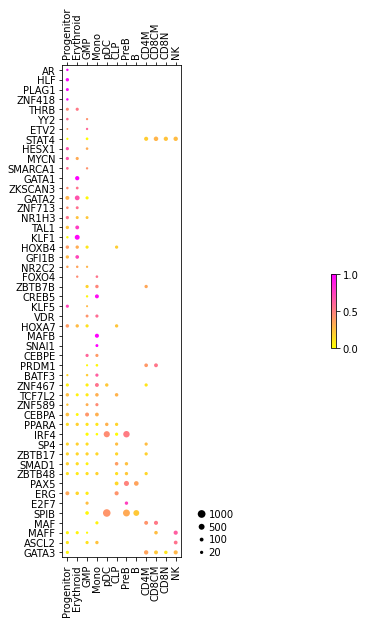

In [5]:
select_state='Progenitor,Erythroid,GMP,Mono,pDC,CLP,PreB,B,CD4M,CD8CM,CD8N,NK'.split(',')
n,v,cpm,cpm_v,reg,reg_s=compute_reg_spec(d0,select_state=select_state)

fig,ax=dotplot(n.loc[reg].iloc[::-1],v.loc[reg].iloc[::-1],size_transform=node_size_map_target,sizes=np.array(node_size_target),cmap=cmap)
ax.tick_params(top=True,labeltop=True)
fig2,ax2=dotplot(cpm.loc[reg].iloc[::-1],cpm_v.loc[reg].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)
ax2.tick_params(top=True,labeltop=True)


Parameters for regulation marker gene selection: stronger criteria as an example

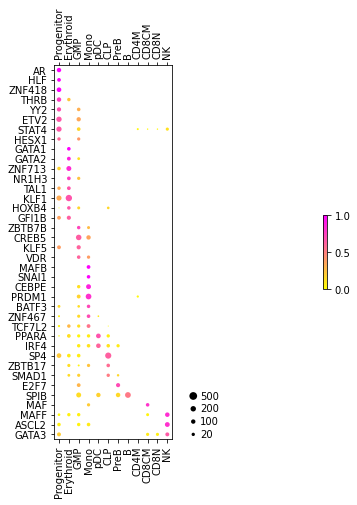

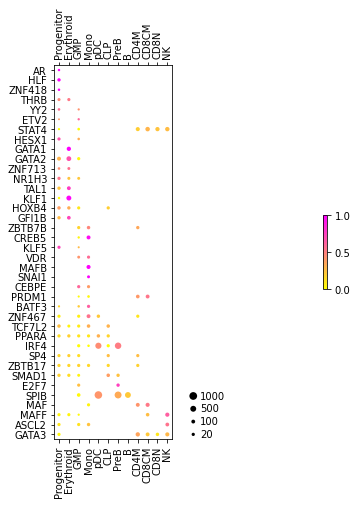

In [6]:
#Specificity entropy level required (relative to random assignment) to select regulator. Lower means more specific.
min_entropy=0.5
#Minimum probability required to be selected
ncut=0.5
#Minimum number of targets required
nmin=25
#Number of top regulation marker TFs to discover for each state
nmax_reg=8
n,v,cpm,cpm_v,reg,reg_s=compute_reg_spec(d0,select_state=select_state,min_entropy=min_entropy,ncut=ncut,nmin=nmin,nmax_reg=nmax_reg)

fig,ax=dotplot(n.loc[reg].iloc[::-1],v.loc[reg].iloc[::-1],size_transform=node_size_map_target,sizes=np.array(node_size_target),cmap=cmap)
ax.tick_params(top=True,labeltop=True)
fig2,ax2=dotplot(cpm.loc[reg].iloc[::-1],cpm_v.loc[reg].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)
ax2.tick_params(top=True,labeltop=True)


## Data inspection

In [7]:
#Regulatory activity (target count)
n.head()

,Progenitor,Erythroid,GMP,Mono,pDC,CLP,PreB,B,CD4M,CD8CM,CD8N,NK
AHR,245,126,138,134,0,223,0,0,72,0,0,0
AR,102,0,0,0,0,0,0,0,0,0,0,0
ARID3A,0,9,12,1,11,3,2,0,0,0,0,0
ARID5B,0,11,6,0,0,2,1,1,0,0,0,1
ARNT,135,169,67,148,0,47,146,0,0,0,0,0


In [8]:
#Regulation cell-type specificity (normalized proportion of targets from each cell type)
v.head()

,Progenitor,Erythroid,GMP,Mono,pDC,CLP,PreB,B,CD4M,CD8CM,CD8N,NK
AHR,0.223546,0.126423,0.132682,0.152066,0.000000,0.261088,0.000000,0.00000,0.104196,0.0,0.0,0.000000
AR,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000
ARID3A,0.000000,0.183605,0.234584,0.023073,0.425682,0.071415,0.061640,0.00000,0.000000,0.0,0.0,0.000000
ARID5B,0.000000,0.425021,0.222149,0.000000,0.000000,0.090172,0.058373,0.08974,0.000000,0.0,0.0,0.114545
ARNT,0.153693,0.211575,0.080376,0.209561,0.000000,0.068659,0.276136,0.00000,0.000000,0.0,0.0,0.000000


In [9]:
#Expression (CPM)
cpm.head()

,Progenitor,Erythroid,GMP,Mono,pDC,CLP,PreB,B,CD4M,CD8CM,CD8N,NK
AHR,29.610959,22.932716,50.377994,68.003889,0.000000,17.484146,0.000000,0.000000,30.135016,0.000000,0.000000,0.000000
AR,5.881629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ARID3A,35.154563,27.994442,53.124324,83.320080,312.869706,23.681059,60.454722,0.000000,0.000000,0.000000,0.000000,0.000000
ARID5B,51.582560,23.965722,12.272663,0.000000,0.000000,113.757611,75.461214,225.853239,221.226467,120.187381,36.191902,74.090132
ARNT,21.160343,24.069022,32.955962,41.414981,0.000000,16.377555,21.437845,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
#Expression cell-type specificity (proportion of CPM from each cell type)
cpm_v.head()

,Progenitor,Erythroid,GMP,Mono,pDC,CLP,PreB,B,CD4M,CD8CM,CD8N,NK
AHR,0.135492,0.104934,0.230516,0.311167,0.000000,0.080003,0.000000,0.000000,0.137889,0.000000,0.000000,0.000000
AR,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ARID3A,0.058925,0.046923,0.089045,0.139658,0.524422,0.039693,0.101332,0.000000,0.000000,0.000000,0.000000,0.000000
ARID5B,0.054036,0.025106,0.012856,0.000000,0.000000,0.119169,0.079051,0.236597,0.231751,0.125905,0.037914,0.077615
ARNT,0.134423,0.152901,0.209356,0.263093,0.000000,0.104040,0.136186,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
#Regulation markers discovered
reg

array(['AR', 'HLF', 'ZNF418', 'THRB', 'YY2', 'ETV2', 'STAT4', 'HESX1',
       'GATA1', 'GATA2', 'ZNF713', 'NR1H3', 'TAL1', 'KLF1', 'HOXB4',
       'GFI1B', 'ZBTB7B', 'CREB5', 'KLF5', 'VDR', 'MAFB', 'SNAI1',
       'CEBPE', 'PRDM1', 'BATF3', 'ZNF467', 'TCF7L2', 'PPARA', 'IRF4',
       'SP4', 'ZBTB17', 'SMAD1', 'E2F7', 'SPIB', 'MAF', 'MAFF', 'ASCL2',
       'GATA3'], dtype='<U12')

In [12]:
#Corresponding cell cluster/type/state name of each regulation marker
reg_s

array(['Progenitor', 'Progenitor', 'Progenitor', 'Progenitor',
       'Progenitor', 'Progenitor', 'Progenitor', 'Progenitor',
       'Erythroid', 'Erythroid', 'Erythroid', 'Erythroid', 'Erythroid',
       'Erythroid', 'Erythroid', 'Erythroid', 'GMP', 'GMP', 'GMP', 'GMP',
       'Mono', 'Mono', 'Mono', 'Mono', 'Mono', 'Mono', 'Mono', 'pDC',
       'pDC', 'CLP', 'CLP', 'CLP', 'PreB', 'B', 'CD8CM', 'NK', 'NK', 'NK'],
      dtype='<U10')